In [3]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib as plt
import matplotlib.pyplot as plotty
from sklearn import preprocessing

%matplotlib inline

In [17]:
# Load the datasets
def import_pricing():
    df = pd.read_csv('../data/raw/01_06_2014_until_04_06_2019.csv')
    return df

def import_numeric():
    df = pd.read_pickle('../data/processed/numeric_only.pkl')
    return df

In [18]:
df = import_numeric()

In [19]:
df.describe()

,price_paid,property_type,new_build,estate_type,district,transaction_category,numcode_days_since
count,3.455510e+05,345551.000000,345551.000000,345551.000000,345551.000000,345551.000000,345551.000000
mean,8.919182e+05,1.791244,0.173540,0.696328,18.875787,0.178463,984.727267
std,4.413271e+06,1.257745,0.378714,0.459843,10.253242,0.382902,512.334337
min,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.499500e+05,1.000000,0.000000,0.000000,10.000000,0.000000,557.000000
50%,4.900000e+05,1.000000,0.000000,1.000000,21.000000,0.000000,963.000000
75%,7.500000e+05,3.000000,0.000000,1.000000,29.000000,0.000000,1411.000000
max,1.000000e+09,4.000000,1.000000,1.000000,33.000000,1.000000,2158.000000


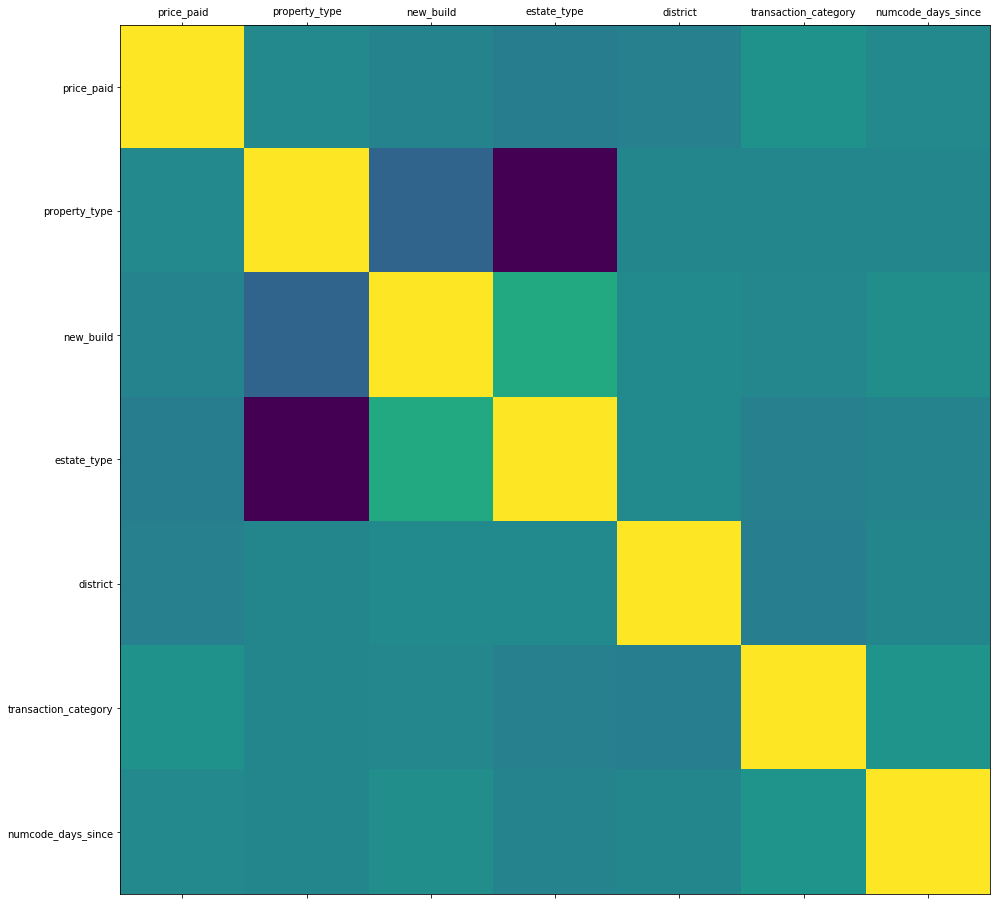

In [20]:
def plot_corr(df, size=16):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    
    Displays:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
                                               0 ------------------>  1
                                               Expect a darkred line running from top left to bottom right
    """
    
    corr = df.corr()    ## data frame correlation function
    fig, ax = plotty.subplots(figsize=(size, size))
    ax.matshow(corr)    # color code the rectangles by correlation value
    plotty.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plotty.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

plot_corr(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cc50da0>,
      dtype=object)

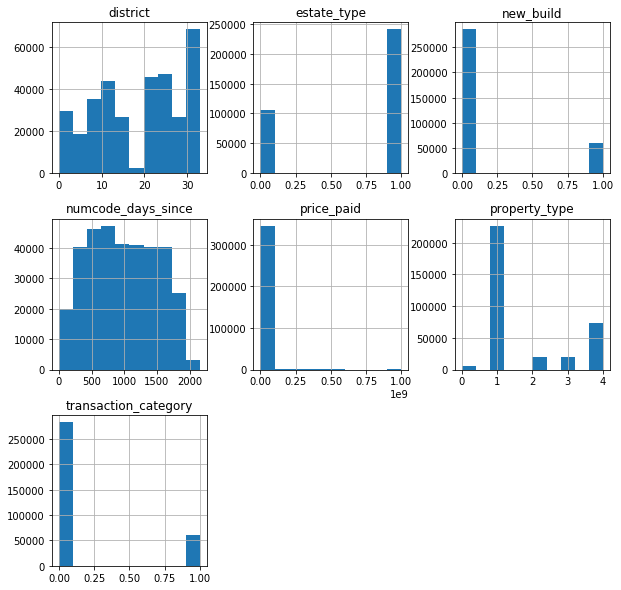

In [21]:
# View the distribution per feature
df.hist(figsize=(10,10))

In [22]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,price_paid,property_type,new_build,estate_type,district,transaction_category,numcode_days_since
price_paid,1,0.0276345,-0.0173636,-0.0680696,-0.0401571,0.0945826,0.0249413
property_type,0.0276345,1,-0.251306,-0.841737,0.00717893,0.00448634,0.00691385
new_build,-0.0173636,-0.251306,1,0.277302,0.0425423,0.0109387,0.0658919
estate_type,-0.0680696,-0.841737,0.277302,1,0.0343953,-0.0423088,-0.0148882
district,-0.0401571,0.00717893,0.0425423,0.0343953,1,-0.0542375,0.00691094
transaction_category,0.0945826,0.00448634,0.0109387,-0.0423088,-0.0542375,1,0.115074
numcode_days_since,0.0249413,0.00691385,0.0658919,-0.0148882,0.00691094,0.115074,1
